In [9]:
import pandas as pd
import json 
import matplotlib.pyplot as plt

df = pd.read_csv('fct_invoice.csv')
with open('dim_customer.json') as json_file:
    data = json.load(json_file)

### How many unique customers are in the dataset? 

In [10]:
df['customer_id'].nunique()

5191

### What are the different categories of products available? How many unique categories are there?

In [11]:
df['category'].value_counts()

Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: category, dtype: int64

### Which payment method is the most popular? How many times was it used?

In [12]:
df['payment_method'].value_counts().idxmax(), df['payment_method'].value_counts().max() 

('Cash', 44447)

### What are the three most popular categories, by total sales?

In [13]:
df['sales'] = df['quantity'] * df['price']
df.groupby('category')['sales'].sum().nlargest(3)

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: sales, dtype: float64

### What are the total sales attributed to customers over the age of 45?

In [14]:
age_id = pd.DataFrame(data['age'].items(), columns=['customer_id', 'age'])
age_id['customer_id'] = age_id['customer_id'].astype(int)
merged_data = df.merge(age_id, on='customer_id')
age_over_45 = merged_data[merged_data['age'] > 45]
age_over_45['sales'].sum()

82053156.99

### How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? 

C:\Users\Malena Riz Ballon\AppData\Local\Temp\ipykernel_21404\1886826967.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['invoice_date'] = pd.to_datetime(df['invoice_date'])


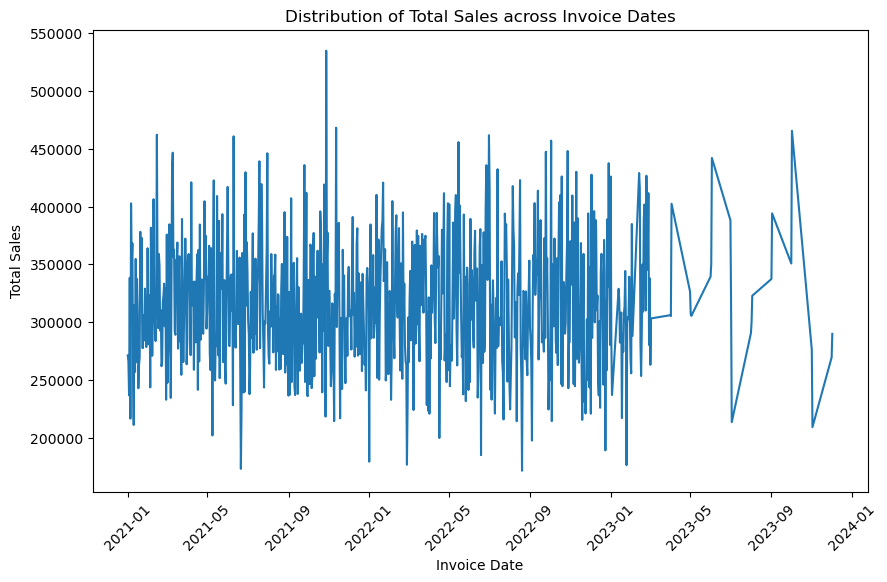

In [15]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'])
sales_per_date = df.groupby('invoice_date')['sales'].sum()
plt.figure(figsize=(10, 6))
plt.plot(sales_per_date.index, sales_per_date.values)
plt.xlabel('Invoice Date')
plt.ylabel('Total Sales')
plt.title('Distribution of Total Sales across Invoice Dates')
plt.xticks(rotation=45)
plt.show()

The graph illustrates a considerable amount of variability and sharp fluctuations in the data, indicating that total sales have been rapidly changing within a short period of time. The apex of total sales was notably reached in the final month of 2021. However, by 2023, the momentum of sales growth or decline has notably decelerated, suggesting a more stable trend.

### Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [16]:
merged_data['decade_age'] = pd.cut(merged_data['age'], bins=range(10, 100, 10), right = False)
pivot_table = pd.pivot_table(merged_data, values='sales', index='category', columns='decade_age', aggfunc='sum')
pivot_table

decade_age,"[10, 20)","[20, 30)","[30, 40)","[40, 50)","[50, 60)","[60, 70)","[70, 80)","[80, 90)"
category,,,,,,,,
Books,12635.10,77007.45,83446.20,86173.20,75204.60,80658.60,55418.70,26330.70
Clothing,1893504.80,10107594.64,11217890.64,11233194.72,10461689.04,10607828.00,7691950.64,4479894.32
Cosmetics,110757.84,594205.24,718950.12,660562.36,592456.86,646331.36,416886.98,247944.68
Food & Beverage,13320.81,73345.52,86587.88,88292.86,72153.08,81164.37,54805.17,31359.08
Shoes,1024490.19,5909273.82,7095209.74,6994981.35,5834252.57,5968090.48,4488671.43,2666555.31
Souvenir,12034.98,55013.70,63342.00,64984.20,55905.18,55893.45,38873.22,22545.06
Technology,1129800.00,5325600.00,6015450.00,5911500.00,4437300.00,5429550.00,3697050.00,1988700.00
Toys,59136.00,380835.84,421191.68,388398.08,343633.92,363991.04,271380.48,151961.60
